In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [10]:

from __future__ import absolute_import,division,print_function,unicode_literals

from tensorflow.keras import datasets,layers,models


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#x_train = x_train.reshape(x_train.shape[0], 32,32, 3)
#x_test =  x_test.reshape(x_test.shape[0], 32,32, 3)

x_train,x_test=x_train/255.0,x_test/255.0



In [11]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [12]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3) ,activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name='sgd'
)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=10,batch_size=100,validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 53s 112ms/step - loss: 2.1111 - accuracy: 0.2141 - val_loss: 1.6138 - val_accuracy: 0.4146
Epoch 2/10
400/400 [==============================] - 43s 107ms/step - loss: 1.5254 - accuracy: 0.4436 - val_loss: 1.3464 - val_accuracy: 0.5135
Epoch 3/10
400/400 [==============================] - 41s 103ms/step - loss: 1.3224 - accuracy: 0.5238 - val_loss: 1.2128 - val_accuracy: 0.5755
Epoch 4/10
400/400 [==============================] - 42s 105ms/step - loss: 1.1522 - accuracy: 0.5900 - val_loss: 1.1194 - val_accuracy: 0.6106
Epoch 5/10
400/400 [==============================] - 43s 108ms/step - loss: 1.0615 - accuracy: 0.6263 - val_loss: 1.0732 - val_accuracy: 0.6251
Epoch 6/10
400/400 [==============================] - 43s 108ms/step - loss: 0.9695 - accuracy: 0.6617 - val_loss: 1.0044 - val_accuracy: 0.6473
Epoch 7/10
400/400 [==============================] - 43s 108ms/step - loss: 0.8861 - accuracy: 0.6884 - val_loss: 0.9985 - val_ac

313/313 - 3s - loss: 0.9547 - accuracy: 0.6734


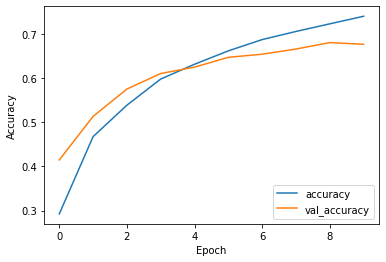

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [4]:
K =len(np.unique(y_train))
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [5]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations =300
lr =1.5e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
#val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

indices = np.arange(Ntr)
rng.shuffle(indices)
x=x_train[indices]
y=y_train[indices]
y_p=x.dot(w1)+b1
print(y_p.shape)
print(y_train.shape)
print(y_test.shape)

w1: (3072, 10)
b1: (10,)
(50000, 10)
(50000, 10)
(10000, 10)


In [6]:
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)#taking different indices randomly to train 
    x=x_train[indices]  #the model 
    y=y_train[indices]
    y_p=x.dot(w1)+b1    #getting y predicted 
    loss=(1./batch_size)*np.square(y_p-y).sum()+reg*(np.sum(w1*w1))
    loss_history.append(loss)
    if t%5==0:
        print('iteration %d : loss %f' % (t,loss))
    items=y_p.shape[0]
    dy_y_p=(1./batch_size)*2.0*(y_p-y)
    dy_w1=x.T.dot(dy_y_p)+reg*w1
    dy_b1=dy_y_p.sum(axis=0)
    w1 -=lr*dy_w1 #Gradient Descent
    b1 -=lr*dy_b1
    lr *=lr_decay #delaying the gradient

iteration 0 : loss 0.999952
iteration 5 : loss 0.903809
iteration 10 : loss 0.873285
iteration 15 : loss 0.853346
iteration 20 : loss 0.839073
iteration 25 : loss 0.828538
iteration 30 : loss 0.820631
iteration 35 : loss 0.814618
iteration 40 : loss 0.809989
iteration 45 : loss 0.806381
iteration 50 : loss 0.803530
iteration 55 : loss 0.801246
iteration 60 : loss 0.799390
iteration 65 : loss 0.797859
iteration 70 : loss 0.796577
iteration 75 : loss 0.795488
iteration 80 : loss 0.794548
iteration 85 : loss 0.793727
iteration 90 : loss 0.793001
iteration 95 : loss 0.792350
iteration 100 : loss 0.791762
iteration 105 : loss 0.791225
iteration 110 : loss 0.790731
iteration 115 : loss 0.790274
iteration 120 : loss 0.789848
iteration 125 : loss 0.789449
iteration 130 : loss 0.789073
iteration 135 : loss 0.788719
iteration 140 : loss 0.788383
iteration 145 : loss 0.788064
iteration 150 : loss 0.787760
iteration 155 : loss 0.787470
iteration 160 : loss 0.787193
iteration 165 : loss 0.786927
it

In [2]:
plt.plot(loss_history)
 
f,ax=plt.subplots(1,10)
f.set_size_inches(15,15)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show()

NameError: name 'loss_history' is not defined

In [145]:

x_t=x_train
y_p=x_t.dot(w1)+b1

train_loss=(1/Ntr)*(np.square(y_train-y_p)).sum()
acc_track=0
for i in range(y_train.shape[0]):
    listp = y_p[i].tolist()
    listT = y_train[i].tolist()
    if listp.index(max(listp))==listT.index(max(listT)):
        acc_track+=1
train_accuracy=(1/Ntr)*acc_track
    


#train_accuracy=1-(1/Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_p,axis=1))).sum()


x_t=x_test
y_p=x_t.dot(w1)+b1
test_loss=(1/Nte)*(np.square(y_test-y_p)).sum()

acc_track=0
for i in range(y_test.shape[0]):
    listp = y_p[i].tolist()
    listT = y_test[i].tolist()
    if listp.index(max(listp))==listT.index(max(listT)):
        acc_track+=1
test_accuracy=(1/Nte)*acc_track
    

print('Training Loss :',train_loss)
print('Training Accuracy :',train_accuracy)




print('Testing Loss :',test_loss)
print('Testing Accuracy :',test_accuracy)

Training Loss : 0.7823159825951956
Training Accuracy : 0.42028000000000004
Testing Loss : 0.787319194328649
Testing Accuracy : 0.4055


In [170]:
std=1e-5
H=200
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = Ntr
iterations =300
lr =1.0e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [171]:
 x_l=x_train*255

for t in range(iterations):
    indices = np.random.choice(Ntr,batch_size)
    rng.shuffle(indices)
   
    x=x_l[indices]
    y=y_train[indices]
    
    h_l=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))  #hidden layer through Sigmoid 
    y_p=h_l.dot(w2)+b2
    loss=(1./batch_size)*np.square(y_p-y).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    
    if t%5==0:
        print('iteration %d : loss %f' % (t,loss))
    
    #BackPropagation
    dl_y_p=(1./batch_size)*2.0*(y_p-y)
    dl_w2=h_l.T.dot(dl_y_p)+reg*w2
    dl_b2=dl_y_p.sum(axis=0)
    dl_h=dl_y_p.dot(w2.T)
    dl_w1=x.T.dot(dl_h*h_l*(1-h_l))+reg*w1
    dl_b1=(dl_h*h_l*(1-h_l)).sum(axis=0)

    w1 -=lr*dl_w1
    b1 -=lr*dl_b1
    w2 -=lr*dl_w2
    b2 -=lr*dl_b2
    lr *=lr_decay

iteration 0 : loss 1.000022
iteration 5 : loss 0.935209
iteration 10 : loss 0.870424
iteration 15 : loss 0.853114
iteration 20 : loss 0.842715
iteration 25 : loss 0.841823
iteration 30 : loss 0.832571
iteration 35 : loss 0.827874
iteration 40 : loss 0.821930
iteration 45 : loss 0.818165
iteration 50 : loss 0.825058
iteration 55 : loss 0.812152
iteration 60 : loss 0.818025
iteration 65 : loss 0.807422
iteration 70 : loss 0.802017
iteration 75 : loss 0.799232
iteration 80 : loss 0.807933
iteration 85 : loss 0.805627
iteration 90 : loss 0.795880
iteration 95 : loss 0.789794
iteration 100 : loss 0.786736
iteration 105 : loss 0.784519
iteration 110 : loss 0.782325
iteration 115 : loss 0.787366
iteration 120 : loss 0.780541
iteration 125 : loss 0.778944
iteration 130 : loss 0.778890
iteration 135 : loss 0.780983
iteration 140 : loss 0.779635
iteration 145 : loss 0.777561
iteration 150 : loss 0.771215
iteration 155 : loss 0.774602
iteration 160 : loss 0.768926
iteration 165 : loss 0.774398
it

Training Loss : 0.7415313937834643
Training Accuracy : 0.45756
Testing Loss : 0.7589591421214091
Testing Accuracy : 0.4345


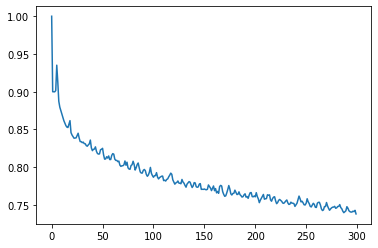

In [172]:
plt.plot(loss_history)

x_t=x_train*255
h_l=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_p=h_l.dot(w2)+b2

train_loss=(1/Ntr)*(np.square(y_train-y_p)).sum()
acc_track=0
for i in range(y_train.shape[0]):
    listp = y_p[i].tolist()
    listT = y_train[i].tolist()
    if listp.index(max(listp))==listT.index(max(listT)):
        acc_track+=1
train_accuracy=(1/Ntr)*acc_track

print('Training Loss :',train_loss)
print('Training Accuracy :',train_accuracy)

x_t=x_test*255
h_l=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_p=h_l.dot(w2)+b2

test_loss=(1/Nte)*(np.square(y_test-y_p)).sum()
acc_track=0
for i in range(y_test.shape[0]):
    listp = y_p[i].tolist()
    listT = y_test[i].tolist()
    if listp.index(max(listp))==listT.index(max(listT)):
        acc_track+=1
test_accuracy=(1/Nte)*acc_track
print('Testing Loss :',test_loss)
print('Testing Accuracy :',test_accuracy)

In [6]:
std=1e-5
H=200
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = 500
iterations =300
print('batch size:' ,iterations)


lr =1.45e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
batch size: 300


In [7]:
x_l=x_train*255
for t in range(iterations):
    for it in range(100):
        indices=np.arange(it*500,batch_size+it*500)
        x=x_l[indices]
        y=y_train[indices]
    
        h_l=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))  #hidden layer through Sigmoid 
        y_p=h_l.dot(w2)+b2
        loss=(1./batch_size)*np.square(y_p-y).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))
        loss_history.append(loss)
        if t%5==0 and it==99:
            print('iteration %d : loss %f' % (t,loss))
        #BackPropagation
        dl_y_p=(1./batch_size)*2.0*(y_p-y)
        dl_w2=h_l.T.dot(dl_y_p)+reg*w2
        dl_b2=dl_y_p.sum(axis=0)
        dl_h=dl_y_p.dot(w2.T)
        dl_w1=x.T.dot(dl_h*h_l*(1-h_l))+reg*w1
        dl_b1=(dl_h*h_l*(1-h_l)).sum(axis=0)

        w1 -=lr*dl_w1
        b1 -=lr*dl_b1
        w2 -=lr*dl_w2
        b2 -=lr*dl_b2
        lr *=lr_decay
    

iteration 0 : loss 0.792296
iteration 5 : loss 0.719580
iteration 10 : loss 0.671106
iteration 15 : loss 0.643429
iteration 20 : loss 0.624208
iteration 25 : loss 0.612048
iteration 30 : loss 0.604846
iteration 35 : loss 0.599658
iteration 40 : loss 0.596388
iteration 45 : loss 0.594565
iteration 50 : loss 0.593480
iteration 55 : loss 0.592811
iteration 60 : loss 0.592387
iteration 65 : loss 0.592117
iteration 70 : loss 0.591945
iteration 75 : loss 0.591838
iteration 80 : loss 0.591771
iteration 85 : loss 0.591729
iteration 90 : loss 0.591704
iteration 95 : loss 0.591689
iteration 100 : loss 0.591679
iteration 105 : loss 0.591673
iteration 110 : loss 0.591670
iteration 115 : loss 0.591668
iteration 120 : loss 0.591667
iteration 125 : loss 0.591666
iteration 130 : loss 0.591665
iteration 135 : loss 0.591665
iteration 140 : loss 0.591665
iteration 145 : loss 0.591665
iteration 150 : loss 0.591665
iteration 155 : loss 0.591665
iteration 160 : loss 0.591665
iteration 165 : loss 0.591665
it

Training Loss : 0.5983435029649206
Training Accuracy : 0.6509600000000001
Testing Loss : 0.7406984465493851
Testing Accuracy : 0.4651


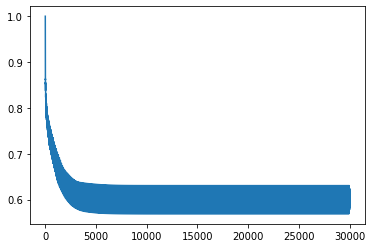

In [8]:
plt.plot(loss_history)

x_t=x_train*255
h_l=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_p=h_l.dot(w2)+b2

train_loss=(1/Ntr)*(np.square(y_train-y_p)).sum()
acc_track=0
for i in range(y_train.shape[0]):
    listp = y_p[i].tolist()
    listT = y_train[i].tolist()
    if listp.index(max(listp))==listT.index(max(listT)):
        acc_track+=1
train_accuracy=(1/Ntr)*acc_track
print('Training Loss :',train_loss)
print('Training Accuracy :',train_accuracy)

x_t=x_test*255
h_l=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_p=h_l.dot(w2)+b2

test_loss=(1/Nte)*(np.square(y_test-y_p)).sum()
acc_track=0
for i in range(y_test.shape[0]):
    listp = y_p[i].tolist()
    listT = y_test[i].tolist()
    if listp.index(max(listp))==listT.index(max(listT)):
        acc_track+=1
test_accuracy=(1/Nte)*acc_track
print('Testing Loss :',test_loss)
print('Testing Accuracy :',test_accuracy)

In [9]:
x=np.arange(1,10)
print(x)

[1 2 3 4 5 6 7 8 9]
